## Environment setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
import sklearn
import seaborn as sns
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
#from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
from sklearn.utils import shuffle
from scipy.stats import norm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score

## Loading the data

In [7]:
df = pd.read_csv('CCCS-CIC-AndMal-2020-dynamic.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53439 entries, 0 to 53438
Columns: 129 entries, Memory_PssTotal to state
dtypes: int64(126), object(3)
memory usage: 52.6+ MB


In [9]:
df.size

6893631

In [10]:
df.shape

(53439, 129)

In [11]:
df

,Memory_PssTotal,Memory_PssClean,Memory_SharedDirty,Memory_PrivateDirty,Memory_SharedClean,Memory_PrivateClean,Memory_HeapSize,Memory_HeapAlloc,Memory_HeapFree,Memory_Views,...,Logcat_debug,Logcat_info,Logcat_warning,Logcat_error,Logcat_verbose,Logcat_total,Process_total,Category,Family,state
0,46430,5156,11304,34336,86444,5176,15429,11470,3958,61,...,2961,3237,1742,959,124,9023,193,Adware,mobidash,after
1,35437,3064,12396,25632,91220,3080,13074,10631,2442,7,...,2190,546,111,1077,1149,5073,191,Adware,pandaad,after
2,56846,2340,10768,47296,95940,2592,16154,11361,4792,174,...,2226,5479,1712,610,145,10172,191,Adware,dowgin,after
3,30576,1152,12664,24312,78192,1164,7913,4720,3192,0,...,1413,2517,9354,3688,117,17089,193,Adware,baiduprotect,after
4,148452,19332,10808,122364,87080,20104,44830,34063,10766,137,...,110,1588,1310,3309,1530,7847,195,Adware,inmobi,after
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53434,83783,36000,10748,37452,91512,37400,10778,9198,1579,12,...,2579,3622,3307,1073,1834,12415,190,Riskware,smsreg,before
53435,52216,1968,10736,39932,95164,5324,20653,15270,5382,118,...,749,2318,1485,3022,2155,9729,187,Riskware,smsreg,before
53436,46710,2944,10816,33336,86796,6116,20203,15561,4641,182,...,2628,2951,3147,2133,747,11606,186,Riskware,smsreg,before
53437,51414,8328,11320,34544,68408,8464,15559,12250,3308,34,...,1450,4084,2865,1792,1090,11281,189,Riskware,smsreg,before


In [12]:
df.tail(1)

,Memory_PssTotal,Memory_PssClean,Memory_SharedDirty,Memory_PrivateDirty,Memory_SharedClean,Memory_PrivateClean,Memory_HeapSize,Memory_HeapAlloc,Memory_HeapFree,Memory_Views,...,Logcat_debug,Logcat_info,Logcat_warning,Logcat_error,Logcat_verbose,Logcat_total,Process_total,Category,Family,state
53438,93788,31140,10608,49152,114032,33496,19485,16889,2595,28,...,3986,3705,1847,1147,3388,14073,187,Riskware,smsreg,before


In [13]:
df.dtypes

Memory_PssTotal         int64
Memory_PssClean         int64
Memory_SharedDirty      int64
Memory_PrivateDirty     int64
Memory_SharedClean      int64
                        ...  
Logcat_total            int64
Process_total           int64
Category               object
Family                 object
state                  object
Length: 129, dtype: object

In [14]:
df.columns

Index(['Memory_PssTotal', 'Memory_PssClean', 'Memory_SharedDirty',
       'Memory_PrivateDirty', 'Memory_SharedClean', 'Memory_PrivateClean',
       'Memory_HeapSize', 'Memory_HeapAlloc', 'Memory_HeapFree',
       'Memory_Views',
       ...
       'Logcat_debug', 'Logcat_info', 'Logcat_warning', 'Logcat_error',
       'Logcat_verbose', 'Logcat_total', 'Process_total', 'Category', 'Family',
       'state'],
      dtype='object', length=129)

In [15]:
df.describe()

,Memory_PssTotal,Memory_PssClean,Memory_SharedDirty,Memory_PrivateDirty,Memory_SharedClean,Memory_PrivateClean,Memory_HeapSize,Memory_HeapAlloc,Memory_HeapFree,Memory_Views,...,Network_TotalTransmittedPackets,Battery_wakelock,Battery_service,Logcat_debug,Logcat_info,Logcat_warning,Logcat_error,Logcat_verbose,Logcat_total,Process_total
count,53439.000000,53439.000000,53439.000000,53439.000000,53439.000000,53439.000000,53439.000000,53439.000000,53439.000000,53439.000000,...,53439.000000,53439.000000,53439.000000,53439.000000,53439.000000,53439.000000,53439.000000,5.343900e+04,5.343900e+04,53439.000000
mean,70918.399034,12742.597429,10855.112259,47633.930650,87981.107506,14316.579801,22279.227231,17541.766163,4736.468759,89.038418,...,465.827617,3.397332,0.721215,2259.764685,2335.078613,2314.741406,2278.087801,2.406940e+03,1.159461e+04,190.167181
std,36366.690217,12894.559046,2144.360998,29898.257374,15859.495550,13463.546087,12502.584219,10458.311683,2920.007863,247.553043,...,3635.819566,1.520636,0.981305,2003.698958,2333.245525,2519.717130,1980.747332,9.290186e+03,1.011978e+04,2.902841
min,4506.000000,0.000000,7036.000000,12.000000,4268.000000,0.000000,5113.000000,3249.000000,983.000000,0.000000,...,0.000000,0.000000,0.000000,40.000000,35.000000,6.000000,33.000000,3.800000e+01,3.121000e+03,172.000000
25%,46165.000000,3968.000000,10540.000000,31968.000000,76642.000000,4980.000000,13486.500000,10669.500000,2993.000000,9.000000,...,0.000000,2.000000,0.000000,1079.000000,1128.000000,1118.000000,1100.000000,1.175000e+03,9.417000e+03,188.000000
50%,61284.000000,6340.000000,10728.000000,41432.000000,89536.000000,8176.000000,20468.000000,16575.000000,4068.000000,35.000000,...,20.000000,3.000000,0.000000,1966.000000,2036.000000,2019.000000,1985.000000,2.077000e+03,1.097700e+04,190.000000
75%,91740.000000,20048.000000,11144.000000,55358.000000,99052.000000,21748.000000,28735.500000,22840.000000,5845.000000,116.000000,...,123.000000,4.000000,1.000000,3005.000000,3048.000000,3032.000000,3013.000000,3.073000e+03,1.298300e+04,192.000000
max,829169.000000,106360.000000,446548.000000,826672.000000,183600.000000,110336.000000,310155.000000,286959.000000,88630.000000,29850.000000,...,85873.000000,18.000000,10.000000,90060.000000,178903.000000,219143.000000,96606.000000,2.066046e+06,2.067038e+06,226.000000


## Data Cleaning 

In [70]:
data = df
mapping_label ={'Adware':0,'Backdoor':1,'FileInfector':2,'Riskware':3,'No_Category':4,'PUA':5,'Ransomware':6,
'Scareware':7,'Trojan':8,'Trojan_Banker':9,'Trojan_Dropper':10,'Trojan_SMS':11,'Trojan_Spy':12,'Zero_Day':13}
numericals_columns = []
categoricals_columns = []
for column in df.columns:
    if data.dtypes[column] == object:
        categoricals_columns.append(column)
    else:
        numericals_columns.append(column)
print(categoricals_columns)
print(len(numericals_columns))

data["label"] = df["Category"]
data = data.replace({'label': mapping_label})
data

['Category', 'Family', 'state', 'label']
126


,Memory_PssTotal,Memory_PssClean,Memory_SharedDirty,Memory_PrivateDirty,Memory_SharedClean,Memory_PrivateClean,Memory_HeapSize,Memory_HeapAlloc,Memory_HeapFree,Memory_Views,...,Logcat_info,Logcat_warning,Logcat_error,Logcat_verbose,Logcat_total,Process_total,Category,Family,state,label
0,46430,5156,11304,34336,86444,5176,15429,11470,3958,61,...,3237,1742,959,124,9023,193,Adware,mobidash,after,0
1,35437,3064,12396,25632,91220,3080,13074,10631,2442,7,...,546,111,1077,1149,5073,191,Adware,pandaad,after,0
2,56846,2340,10768,47296,95940,2592,16154,11361,4792,174,...,5479,1712,610,145,10172,191,Adware,dowgin,after,0
3,30576,1152,12664,24312,78192,1164,7913,4720,3192,0,...,2517,9354,3688,117,17089,193,Adware,baiduprotect,after,0
4,148452,19332,10808,122364,87080,20104,44830,34063,10766,137,...,1588,1310,3309,1530,7847,195,Adware,inmobi,after,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53434,83783,36000,10748,37452,91512,37400,10778,9198,1579,12,...,3622,3307,1073,1834,12415,190,Riskware,smsreg,before,3
53435,52216,1968,10736,39932,95164,5324,20653,15270,5382,118,...,2318,1485,3022,2155,9729,187,Riskware,smsreg,before,3
53436,46710,2944,10816,33336,86796,6116,20203,15561,4641,182,...,2951,3147,2133,747,11606,186,Riskware,smsreg,before,3
53437,51414,8328,11320,34544,68408,8464,15559,12250,3308,34,...,4084,2865,1792,1090,11281,189,Riskware,smsreg,before,3


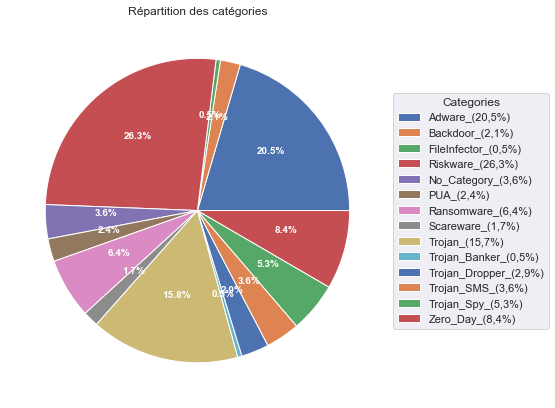

In [71]:
fig, ax = plt.subplots(figsize=(14, 7), subplot_kw=dict(aspect="equal"))

recipe = ["10920 Adware_(20,5%)",
          "1133 Backdoor_(2,1%)",
          "248 FileInfector_(0,5%)",
          "14053 Riskware_(26,3%)",
          "1932 No_Category_(3,6%)",
          "1290 PUA_(2,4%)",
          "3411 Ransomware_(6,4%)",
          "886 Scareware_(1,7%)",
          "8437 Trojan_(15,7%)",
          "241 Trojan_Banker_(0,5%)",
          "1570 Trojan_Dropper_(2,9%)",
          "1939 Trojan_SMS_(3,6%)",
          "2840 Trojan_Spy_(5,3%)",
          "4475 Zero_Day_(8,4%)"]

infos = [float(x.split()[0]) for x in recipe]
ingredients = [x.split()[-1] for x in recipe]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n".format(pct, absolute)


wedges, texts, autotexts = ax.pie(infos, autopct=lambda pct: func(pct, infos),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          title="Categories",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=10, weight="bold")

ax.set_title("Répartition des catégories")

plt.show()


<AxesSubplot:xlabel='state', ylabel='count'>

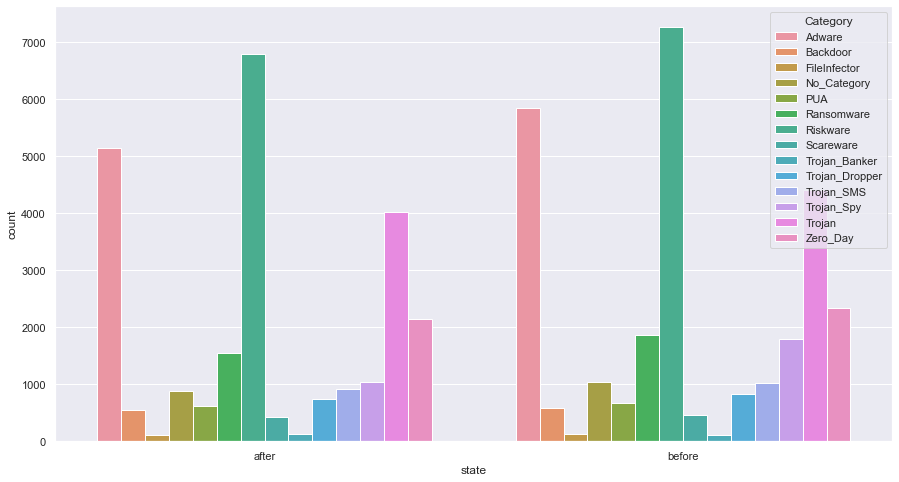

In [72]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.countplot(x="state", hue="Category", data=data)

In [73]:
def get_selected_columns(data, threshold):
    corr = data.corr()
    columns = np.full((corr.shape[0],), True, dtype=bool)
    for i in range(corr.shape[0]):
        for j in range(i+1, corr.shape[0]):
            if corr.iloc[i,j] >= threshold:
                if columns[j]:
                    columns[j] = False
    return list(data.columns[columns])

In [74]:
data["Family"] = data["Family"].apply(lambda x: "SINGLETON" if not pd.isnull(x) and x.startswith("SINGLETON") else x)
family = data["Family"].values.tolist()
most_family = max(set(family), key=family.count)
data["Family"] = data["Family"].apply(lambda x: most_family if not pd.isnull(x) and x == "<unknown>" else x)
data["state"] = data["state"].apply(lambda x: 1 if x == "after" else 0)

selected_columns = get_selected_columns(data[numericals_columns], 0.7)

data = data[selected_columns+["state","Family","label"]]
data

,Memory_PssTotal,Memory_PssClean,Memory_SharedDirty,Memory_SharedClean,Memory_Views,Memory_ViewRootImpl,Memory_AppContexts,Memory_Assets,Memory_LocalBinders,Memory_ParcelMemory,...,Battery_service,Logcat_debug,Logcat_info,Logcat_warning,Logcat_error,Logcat_verbose,Process_total,state,Family,label
0,46430,5156,11304,86444,61,4,6,2,12,4,...,0,2961,3237,1742,959,124,193,1,mobidash,0
1,35437,3064,12396,91220,7,1,5,2,9,3,...,0,2190,546,111,1077,1149,191,1,pandaad,0
2,56846,2340,10768,95940,174,6,7,3,19,13,...,1,2226,5479,1712,610,145,191,1,dowgin,0
3,30576,1152,12664,78192,0,0,2,2,2,6,...,0,1413,2517,9354,3688,117,193,1,baiduprotect,0
4,148452,19332,10808,87080,137,1,5,4,38,9,...,0,110,1588,1310,3309,1530,195,1,inmobi,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53434,83783,36000,10748,91512,12,0,4,4,14,12,...,1,2579,3622,3307,1073,1834,190,0,smsreg,3
53435,52216,1968,10736,95164,118,2,8,2,28,7,...,3,749,2318,1485,3022,2155,187,0,smsreg,3
53436,46710,2944,10816,86796,182,3,5,2,17,6,...,0,2628,2951,3147,2133,747,186,0,smsreg,3
53437,51414,8328,11320,68408,34,4,6,2,26,45,...,1,1450,4084,2865,1792,1090,189,0,smsreg,3


In [47]:

len(selected_columns)

97

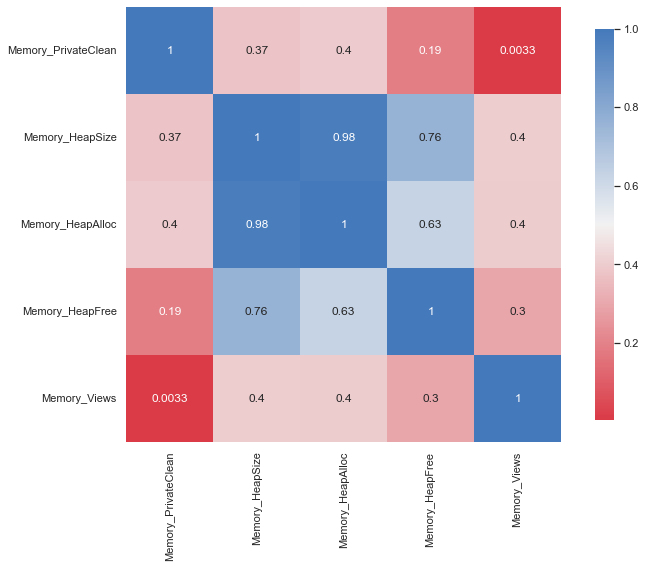

In [38]:
#Memory_SharedClean, Memory_PssTotal
s , ax = plt.subplots(figsize =( 12 , 8))
cmap = sns.diverging_palette(10, 250  , as_cmap = True )
s = sns.heatmap(df[numericals_columns].corr(), cmap = cmap, square=True,ax=ax, annot = True,cbar_kws={'shrink' : .9 }, annot_kws = {'fontsize':12})

In [75]:
num_data = pd.get_dummies(data, columns=["Family"])
num_data

,Memory_PssTotal,Memory_PssClean,Memory_SharedDirty,Memory_SharedClean,Memory_Views,Memory_ViewRootImpl,Memory_AppContexts,Memory_Assets,Memory_LocalBinders,Memory_ParcelMemory,...,Family_yzhcsms,Family_zadmo,Family_zapch,Family_zbot,Family_zdtad,Family_zhidian,Family_zhui,Family_zitmo,Family_ztorg,Family_zypush
0,46430,5156,11304,86444,61,4,6,2,12,4,...,0,0,0,0,0,0,0,0,0,0
1,35437,3064,12396,91220,7,1,5,2,9,3,...,0,0,0,0,0,0,0,0,0,0
2,56846,2340,10768,95940,174,6,7,3,19,13,...,0,0,0,0,0,0,0,0,0,0
3,30576,1152,12664,78192,0,0,2,2,2,6,...,0,0,0,0,0,0,0,0,0,0
4,148452,19332,10808,87080,137,1,5,4,38,9,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53434,83783,36000,10748,91512,12,0,4,4,14,12,...,0,0,0,0,0,0,0,0,0,0
53435,52216,1968,10736,95164,118,2,8,2,28,7,...,0,0,0,0,0,0,0,0,0,0
53436,46710,2944,10816,86796,182,3,5,2,17,6,...,0,0,0,0,0,0,0,0,0,0
53437,51414,8328,11320,68408,34,4,6,2,26,45,...,0,0,0,0,0,0,0,0,0,0


In [76]:
print(num_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53439 entries, 0 to 53438
Columns: 602 entries, Memory_PssTotal to Family_zypush
dtypes: int64(99), uint8(503)
memory usage: 66.0 MB
None


## Split dataset between training and test

In [132]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

X = np.array(num_data.drop("label", axis=1))[:,0:200]
#X = X[:10000]

In [133]:
y = data["label"].values
#y = y[:10000]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

rOs = RandomOverSampler()
#X_train, y_train = rOs.fit_resample(X_train, y_train)

In [134]:
print(f"Training dataset: {X_train.shape}")
print(f"Test dataset: {X_test.shape}")

Training dataset: (42751, 200)
Test dataset: (10688, 200)


<AxesSubplot:xlabel='label', ylabel='count'>

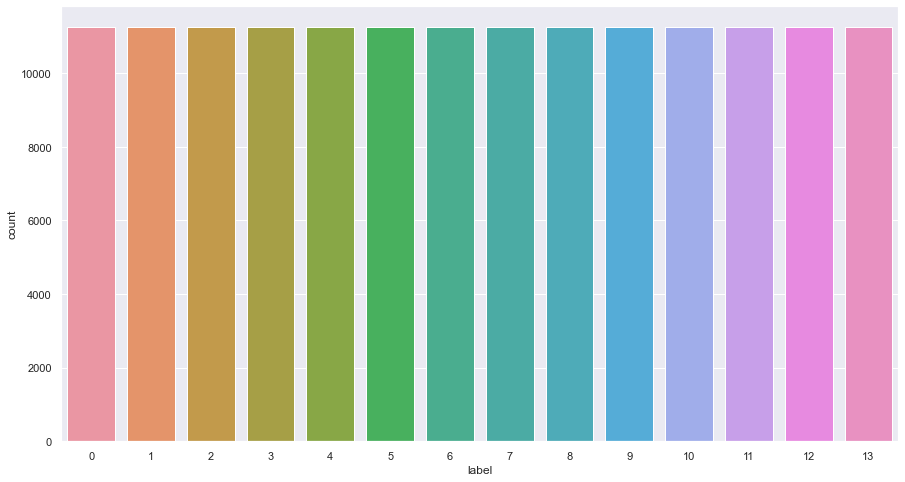

In [127]:
tr = pd.DataFrame(X_train, columns= list(range(X_train.shape[1])))
tr['label'] = y_train
tr
sns.countplot(x="label", data=tr)

# Classic Machine Learning Models

In [25]:
def plot_confusion_matrix(cm, classes=None, title=None, model=None):
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0, vmax=1, annot=True, annot_kws={'size':40})
    else:
        sns.heatmap(cm, vmin=0, vmax=1)
    plt.title(title+" "+model)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")

# 1. Decision Tree Model

In [136]:
DT = DecisionTreeClassifier(max_depth=10)
DT.fit(X_train, y_train)
predict_dt = DT.predict(X_test)
print('Accuracy Score:',DT.score(X_test, y_test))

Accuracy Score: 0.6119947604790419


cm = confusion_matrix(y_test, predict_dt)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
classes = np.unique(y_testl)
plot_confusion_matrix(cm_norm, classes, title="Confusion Matrix for Build Model", model="Decicion Tree")

# 2. Random Forest

In [131]:
RF = RandomForestClassifier(n_estimators=200)
RF.fit(X_train, y_train)
predict_rf = DT.predict(X_test)
print('Accuracy Score:', RF.score(X_test, y_test))

Accuracy Score: 0.8959580838323353


# 3. Gradient Boosting

In [ ]:
xg = XGClassifier(learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 10)
xg.fit(X_train, y_train)
predictions_xg = xg.predict(X_test)
score_xg = np.sum(predictions_xg == y_test) / len(y_test)
print("Score ", score_xg)

# 4. Support Vector Machine

In [ ]:
svm_clf = SVC(gamma='auto')
svm_clf.fit(X_train, y_train)
predictions_svm = svm_clf.predict(X_test)
score_svm = np.sum(predicted == y_test) / len(y_test)
print("Score ", score_svm)

# 5. K-Nearest Neighor

In [57]:
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)
predicted = knn_clf.predict(X_test)
score = np.sum(predicted == y_test) / len(y_test)
print("Score ", score)

Score  0.6055389221556886


# Deep Learning Models

In [27]:
from keras.models import Sequential
from keras.layers import LSTM, Embedding, Conv1D, Flatten, Dense, Dropout, Activation, MaxPooling1D

## 1. Neural Network (NN)

In [119]:
row_size = X.shape[0] #number of rows
column_size = X.shape[1] #number of columns
hidden_layer = 100 #number of neuron in hidden layer
output_layer = 14 #number of output neuron
model = Sequential()
model.add(Dense(hidden_layer, input_shape=(column_size,), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(hidden_layer, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(output_layer, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 100)               15100     
                                                                 
 dropout_11 (Dropout)        (None, 100)               0         
                                                                 
 dense_19 (Dense)            (None, 100)               10100     
                                                                 
 dropout_12 (Dropout)        (None, 100)               0         
                                                                 
 dense_20 (Dense)            (None, 14)                1414      
                                                                 
Total params: 26,614
Trainable params: 26,614
Non-trainable params: 0
_________________________________________________________________


In [120]:
batch_size = 32
epochs = 10
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

Epoch 1/10
4923/4923 [==============================] - 17s 3ms/step - loss: 8366.9121 - accuracy: 0.0736 - val_loss: 2.6395 - val_accuracy: 0.0211
Epoch 2/10
4923/4923 [==============================] - 15s 3ms/step - loss: 37.9434 - accuracy: 0.0713 - val_loss: 2.6265 - val_accuracy: 0.2104
Epoch 3/10
4923/4923 [==============================] - 14s 3ms/step - loss: 26.9388 - accuracy: 0.0718 - val_loss: 2.6408 - val_accuracy: 0.0351
Epoch 4/10
4923/4923 [==============================] - 12s 2ms/step - loss: 2.8144 - accuracy: 0.0704 - val_loss: 2.6392 - val_accuracy: 0.0041
Epoch 5/10
4923/4923 [==============================] - 14s 3ms/step - loss: 2.7535 - accuracy: 0.0712 - val_loss: 2.6356 - val_accuracy: 0.0041
Epoch 6/10
4923/4923 [==============================] - 13s 3ms/step - loss: 3.1806 - accuracy: 0.0703 - val_loss: 2.6330 - val_accuracy: 0.1506
Epoch 7/10
4923/4923 [==============================] - 13s 3ms/step - loss: 2.7795 - accuracy: 0.0694 - val_loss: 2.6421 - v

/var/folders/f9/r8b1hbc521q0393y0lfxn0wr0000gn/T/ipykernel_38943/1779327370.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  plt.plot(epochs, history.history['accuracy'], 'b', label="Trainning accuracy", color='green')
/var/folders/f9/r8b1hbc521q0393y0lfxn0wr0000gn/T/ipykernel_38943/1779327370.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  plt.plot(epochs, history.history['val_accuracy'], 'b', label="Validation accuracy", color='blue')


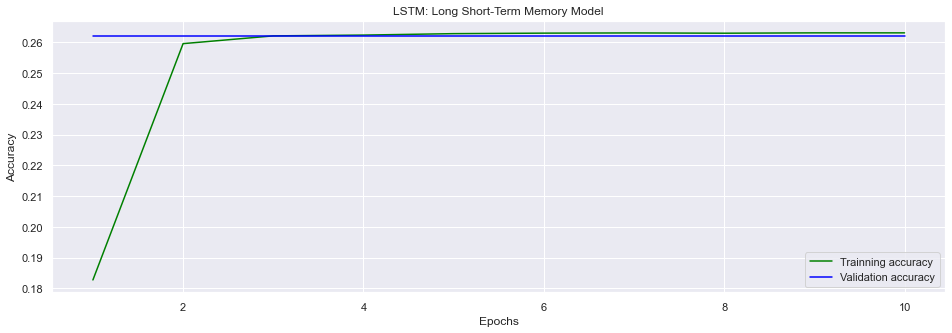

In [107]:
plt.figure(figsize=(16, 5))
epochs = range(1, len(history.history['accuracy'])+1)
plt.plot(epochs, history.history['accuracy'], 'b', label="Trainning accuracy", color='green')
plt.plot(epochs, history.history['val_accuracy'], 'b', label="Validation accuracy", color='blue')
plt.title("LSTM: Long Short-Term Memory Model")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## 2. LSTM : Long Short-Term Memory (RNN)

In [108]:
row_size = X.shape[0] #number of rows
column_size = X.shape[1] #number of columns
hidden_layer = 100 #number of neuron in hidden layer
output_layer = 14 #number of output neuron

model_1 = Sequential()
model_1.add(LSTM(hidden_layer, activation='relu', return_sequences=True, input_shape=(column_size, 1)))
model_1.add(LSTM(hidden_layer, activation='relu'))
model_1.add(Dense(output_layer, activation='softmax'))
model_1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 150, 100)          40800     
                                                                 
 lstm_5 (LSTM)               (None, 100)               80400     
                                                                 
 dense_11 (Dense)            (None, 14)                1414      
                                                                 
Total params: 122,614
Trainable params: 122,614
Non-trainable params: 0
_________________________________________________________________


In [109]:
batch_size = 32
epochs = 10
history_1 = model_1.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

Epoch 1/10
 396/1336 [=======>......................] - ETA: 4:09 - loss: nan - accuracy: 0.2023

KeyboardInterrupt: 

In [112]:
row_size = X.shape[0] #number of rows
column_size = X.shape[1] #number of columns
nb_filters = 16
kernel_size = 3
hidden_layer = 100 #number of neuron in hidden layer
output_layer = 14 #number of output neuron

model_2 = Sequential()
#Convolution
model_2.add(Conv1D(nb_filters, kernel_size, input_shape=(column_size, 1), padding='valid', activation='relu'))
model_2.add(MaxPooling1D())
model_2.add(Conv1D(nb_filters, kernel_size, padding='valid', activation='relu'))
model_2.add(MaxPooling1D())
model_2.add(Flatten())

#Learning
model_2.add(Dense(hidden_layer, activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(output_layer, activation='softmax'))
model_2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 148, 16)           64        
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 74, 16)           0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 72, 16)            784       
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 36, 16)           0         
 1D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 576)               0         
                                                                 
 dense_16 (Dense)            (None, 100)              

In [113]:
batch_size = 32
epochs = 10
history_2 = model_2.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

Epoch 1/10
1336/1336 [==============================] - 14s 9ms/step - loss: 3072.8650 - accuracy: 0.2441 - val_loss: 2.2160 - val_accuracy: 0.2624
Epoch 2/10
1336/1336 [==============================] - 11s 8ms/step - loss: 2.1446 - accuracy: 0.2631 - val_loss: 2.1821 - val_accuracy: 0.2623
Epoch 3/10
1336/1336 [==============================] - 12s 9ms/step - loss: 2.1243 - accuracy: 0.2625 - val_loss: 2.1463 - val_accuracy: 0.2623
Epoch 4/10
1336/1336 [==============================] - 11s 9ms/step - loss: 2.1252 - accuracy: 0.2632 - val_loss: 2.1902 - val_accuracy: 0.2623
Epoch 5/10
1336/1336 [==============================] - 11s 8ms/step - loss: 2.1271 - accuracy: 0.2626 - val_loss: 2.1657 - val_accuracy: 0.2624
Epoch 6/10
1336/1336 [==============================] - 11s 8ms/step - loss: 2.1182 - accuracy: 0.2632 - val_loss: 2.1553 - val_accuracy: 0.2623
Epoch 7/10
1336/1336 [==============================] - 11s 8ms/step - loss: 2.1383 - accuracy: 0.2630 - val_loss: 2.1629 - val

/var/folders/f9/r8b1hbc521q0393y0lfxn0wr0000gn/T/ipykernel_38943/3228196286.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  plt.plot(epochs, history_2.history['accuracy'], 'b', label="Trainning accuracy", color='green')
/var/folders/f9/r8b1hbc521q0393y0lfxn0wr0000gn/T/ipykernel_38943/3228196286.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  plt.plot(epochs, history_2.history['val_accuracy'], 'b', label="Validation accuracy", color='blue')


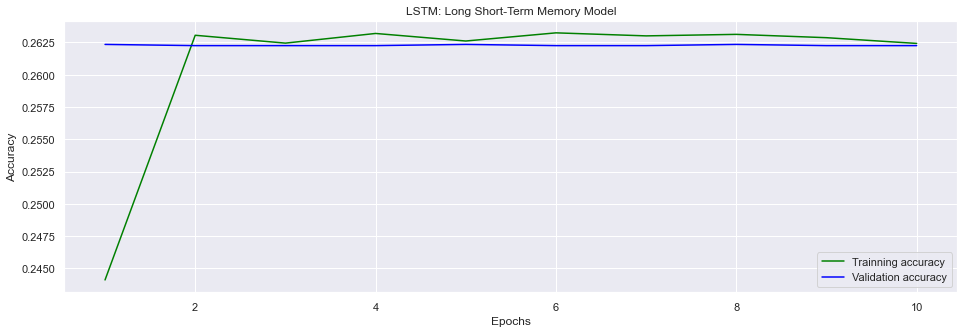

In [114]:
plt.figure(figsize=(16, 5))
epochs = range(1, len(history_2.history['accuracy'])+1)
plt.plot(epochs, history_2.history['accuracy'], 'b', label="Trainning accuracy", color='green')
plt.plot(epochs, history_2.history['val_accuracy'], 'b', label="Validation accuracy", color='blue')
plt.title("LSTM: Long Short-Term Memory Model")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## BAYES model

In [54]:
df = shuffle(df)
df.head(10)

,Memory_PssTotal,Memory_PssClean,Memory_SharedDirty,Memory_PrivateDirty,Memory_SharedClean,Memory_PrivateClean,Memory_HeapSize,Memory_HeapAlloc,Memory_HeapFree,Memory_Views,...,Logcat_debug,Logcat_info,Logcat_warning,Logcat_error,Logcat_verbose,Logcat_total,Process_total,Category,Family,state
9674,33463,3540,8744,23708,63428,3552,6408,3920,2487,0,...,3254,5226,1119,2260,168,12027,195,Riskware,smspay,after
36720,75868,7036,11232,59948,90424,7052,45080,38909,6170,124,...,7835,3863,1080,1725,2260,16763,184,No_Category,pinap,before
1426,233757,3652,11000,219232,89252,3716,71700,59023,12676,316,...,1687,1197,2543,126,3597,9150,195,Adware,leadbolt,after
24079,44450,7740,12332,28504,86136,7756,15222,11766,3455,12,...,5143,2892,2253,1629,669,12586,186,Trojan,styricka,before
9937,47622,6796,11988,32716,99648,6812,16611,13465,3145,20,...,1267,2158,1444,113,795,5777,191,Riskware,smsreg,after
24573,50524,8148,9508,22364,82756,12284,13783,11176,2606,17,...,6455,1209,2616,3849,1520,15649,188,Trojan,<unknown>,before
33995,35190,2620,13128,26912,77344,2632,8970,4826,4143,0,...,832,1686,1512,4609,1690,10329,188,Backdoor,hiddad,before
15461,80702,32808,10804,38076,99940,34184,12994,9911,3082,30,...,3258,624,3071,1184,4085,12222,188,Riskware,smsreg,after
15406,33729,2800,12916,26020,80940,2812,8935,5099,3835,0,...,3892,6332,3210,1306,144,14884,192,Riskware,jiagu,after
31573,54851,9804,10020,35828,76588,9848,15806,12938,2867,94,...,3201,2467,863,1516,2813,10860,187,Adware,mobidash,before


# Neural Network